# Data Assessment & Analytics
Notes:
- change os directory location
- be aware of the number of provdied native source data files
- beware of of what data is available

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\Alaska\WaterAllocation


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/Alaska/WaterAllocation" # set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: CombinedPOD_Points
dfin1 = pd.read_csv(InputFolderString + '/RawinputData/CombinedPOD_Points.zip')

# Data Set 2: CombinedPOU_Polygon
dfin2 = pd.read_csv(InputFolderString + '/RawinputData/CombinedPOU_Polygon.zip')

In [5]:
# WaDE Processed Input Data
#################################################################

dfm = pd.read_csv(InputFolderString + "/ProcessedInputData/methods.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfv = pd.read_csv(InputFolderString + "/ProcessedInputData/variables.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfo = pd.read_csv(InputFolderString + "/ProcessedInputData/organizations.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfws = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")
dfspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sites_missing.csv").replace(np.nan, "")

dfaa = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations.csv").replace(np.nan, "")
dfaapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations_missing.csv").replace(np.nan, "")

C:\Users\rjame\AppData\Local\Temp\ipykernel_17476\2041931760.py:16: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfaa = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations.csv").replace(np.nan, "")


# Water Source Info (watersources.csv)

In [6]:
print(len(dfws))
dfws.head(1)

3


WaterSourceUUID Geometry GNISFeatureNameCV WaterQualityIndicatorCV  \
0  AKwr_WSwadeId1                                              Fresh   

  WaterSourceName WaterSourceNativeID WaterSourceTypeCV  
0      WaDE Blank             wadeId1        SUBSURFACE

<Axes: >

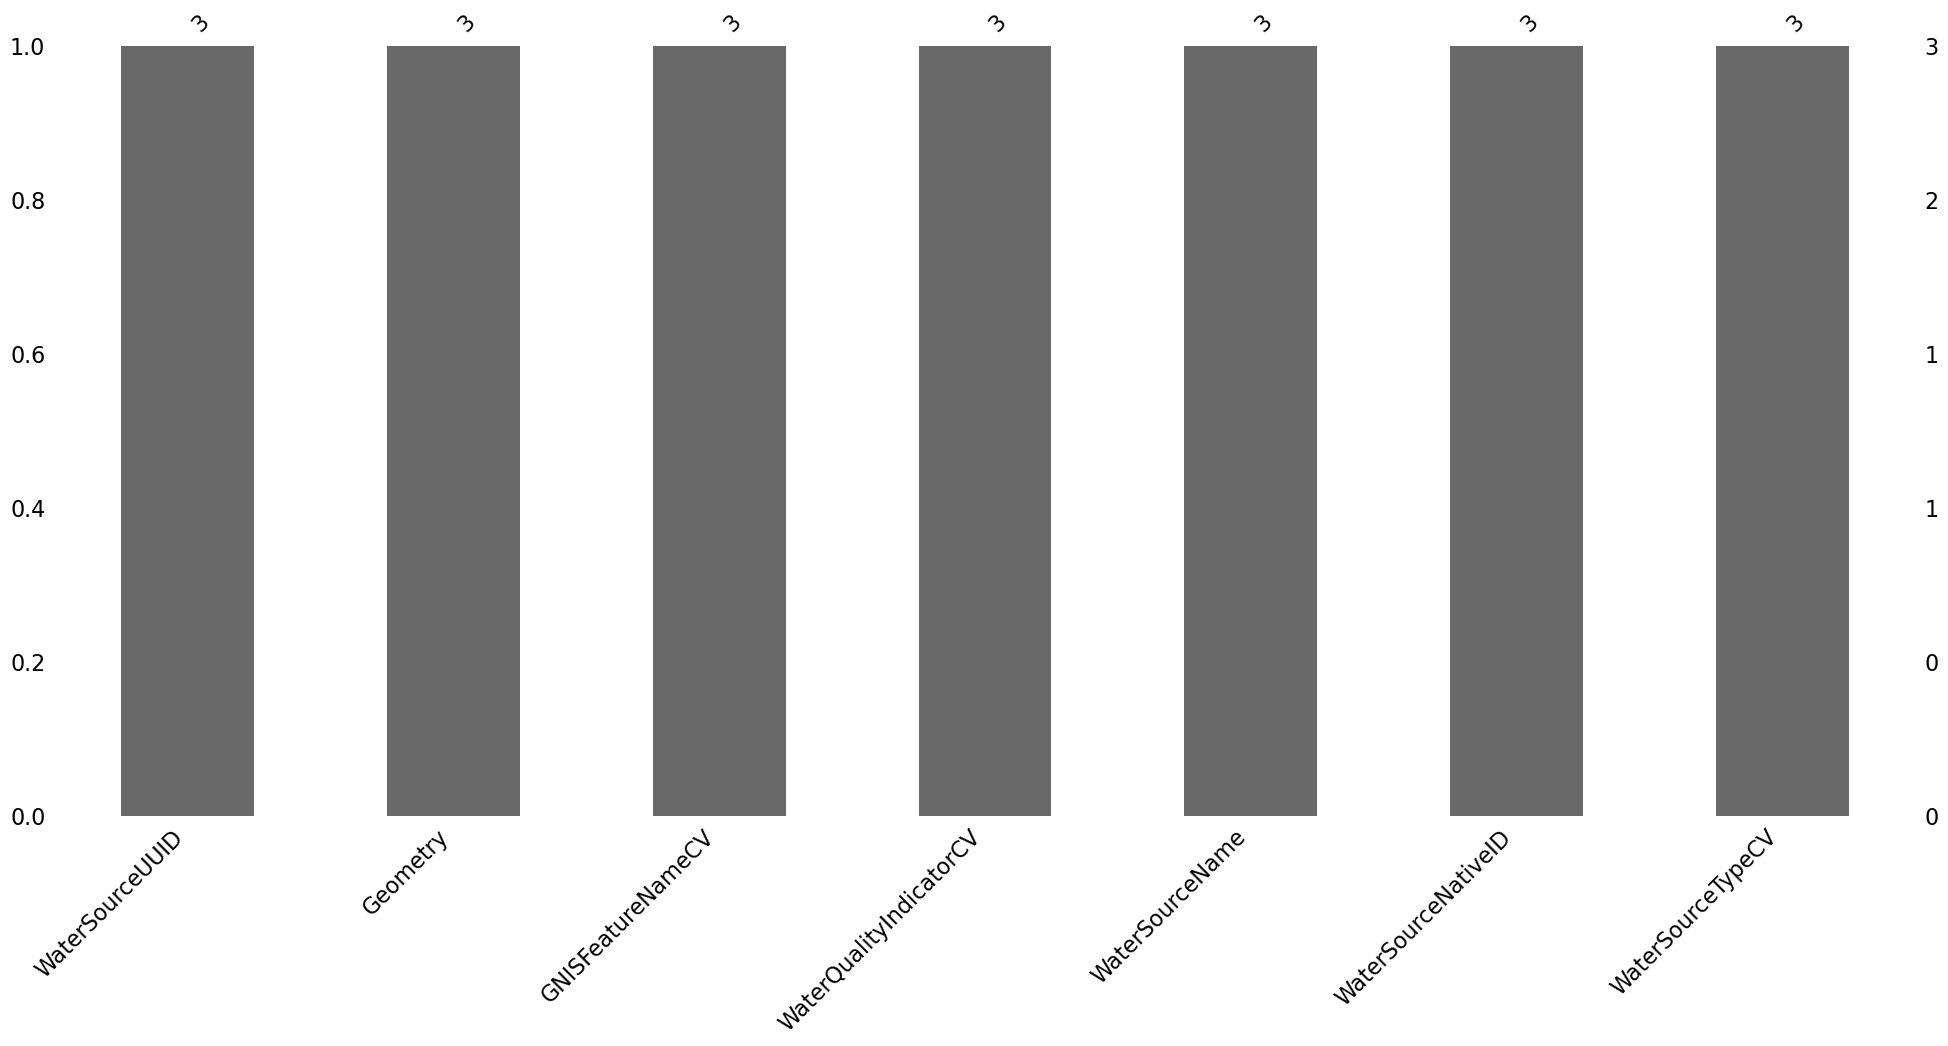

In [7]:
# Check what columns contain missing information.
#msno.matrix(dfws, figsize=(10,5), fontsize=10)
msno.bar(dfws)

In [8]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"SUBSURFACE",
"SURFACE",
"WaDE Blank",


# Site Info (sites.csv)

In [9]:
print(len(dfs))
dfs.head(1)

17373


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  AKwr_SPODADL100002                          AKwr_WSwadeId1   

  CoordinateAccuracy CoordinateMethodCV      County  EPSGCodeCV Geometry  \
0         WaDE Blank          Digitized  WaDE Blank        4326            

  GNISCodeCV HUC12 HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV  \
0                        58.38292 -134.64421                                   

  PODorPOUSite    SiteName   SiteNativeID SitePoint  SiteTypeCV StateCV  \
0          POD  WaDE Blank  PODADL 100002            WaDE Blank      AK   

  USGSSiteID  
0

<Axes: >

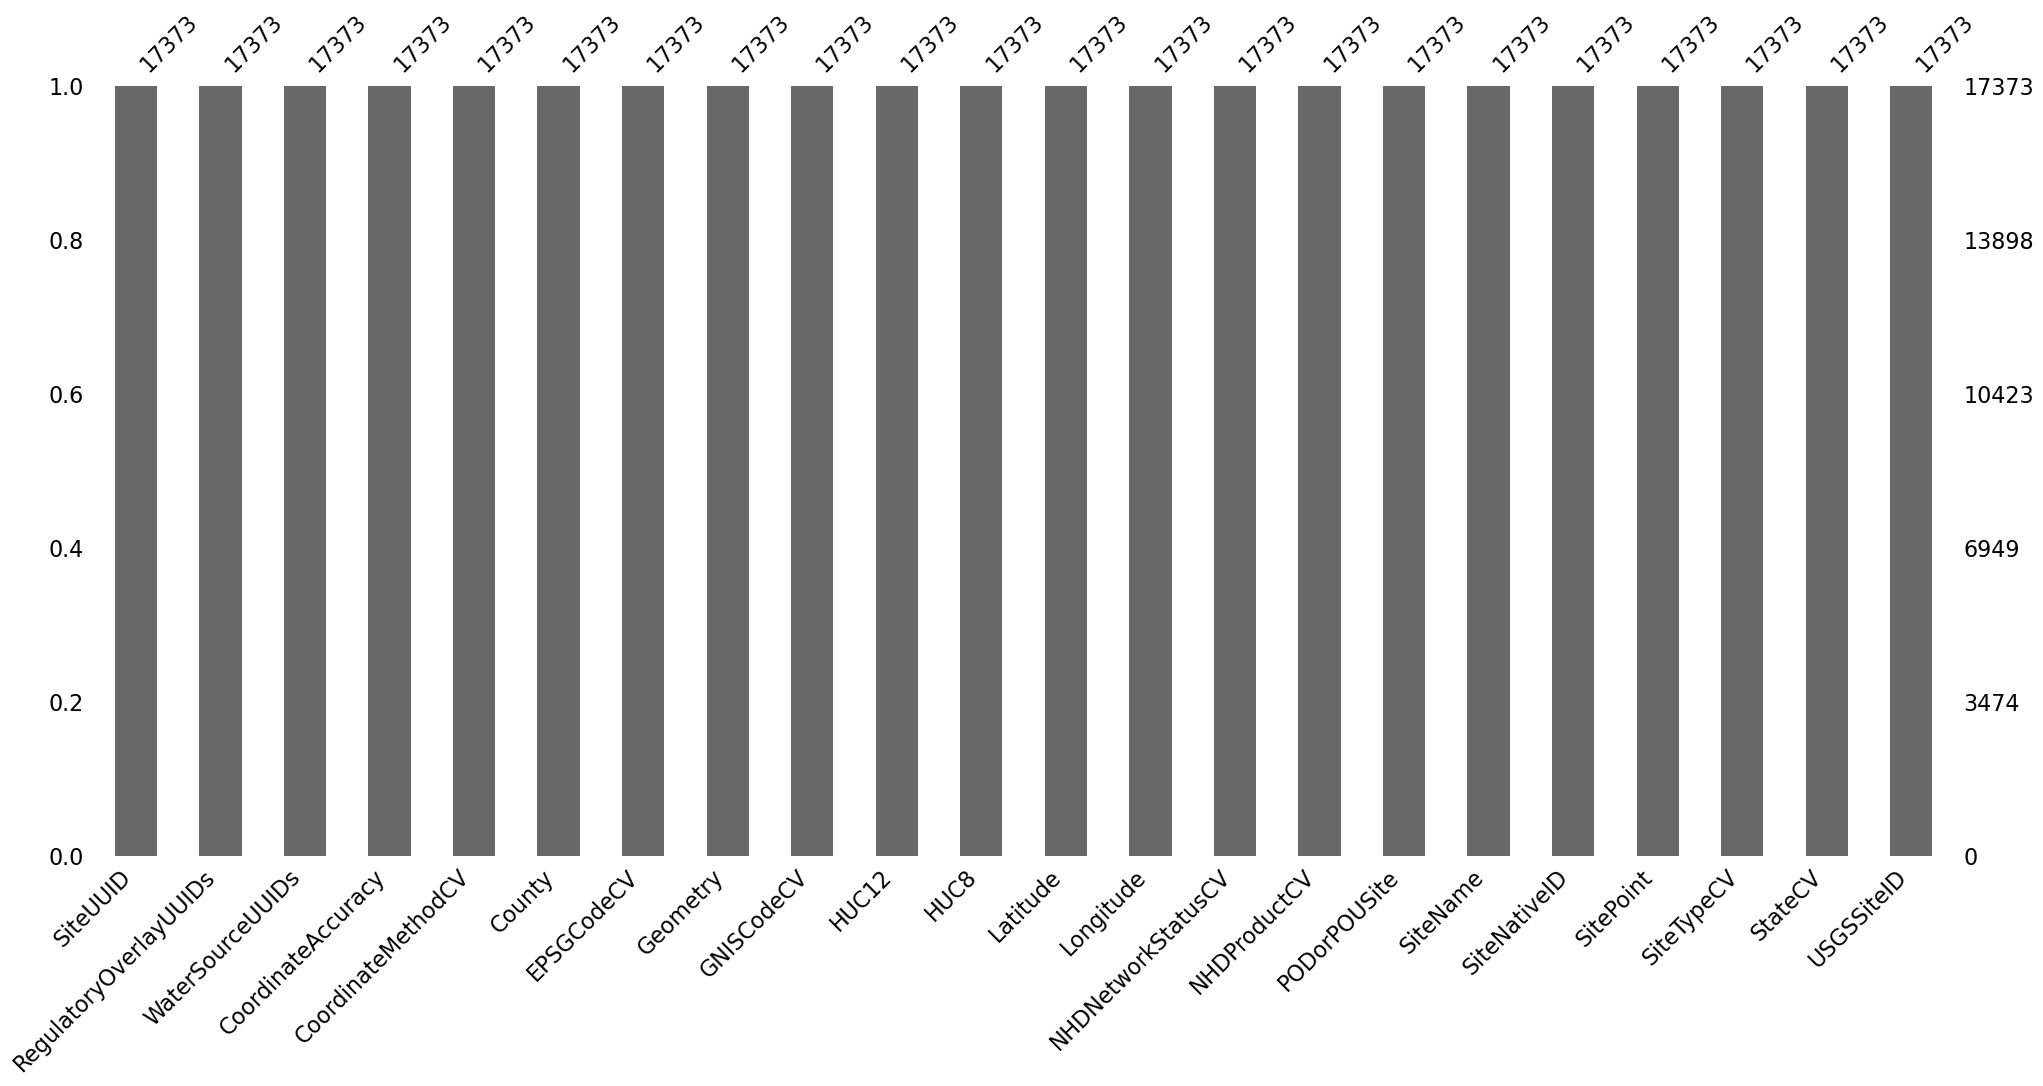

In [10]:
# Check what columns contain missing information.
#msno.matrix(dfs, figsize=(10,5), fontsize=10)
msno.bar(dfs)

In [11]:
# Unique values for 'CoordinateMethodCV'
for x in dfs['CoordinateMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"Digitized",


In [12]:
# Unique values for 'SiteTypeCV'
for x in dfs['SiteTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"WaDE Blank",


# Allocation Amount Info (waterallocations.csv)

In [13]:
print(len(dfaa))
dfaa.head(1)

17456


AllocationUUID MethodUUID OrganizationUUID          SiteUUID  \
0  AKwr_WR1100000    AKwr_M1          AKwr_O1  AKwr_SPODLAS9092   

  VariableSpecificUUID AllocationApplicationDate  \
0              AKwr_V1                             

  AllocationAssociatedConsumptiveUseSiteIDs  \
0                                             

  AllocationAssociatedWithdrawalSiteIDs AllocationBasisCV  \
0                                              WaDE Blank   

  AllocationChangeApplicationIndicator AllocationCommunityWaterSupplySystem  \
0                                                                             

  AllocationCropDutyAmount AllocationExpirationDate  AllocationFlow_CFS  \
0                                                               0.00000   

  AllocationLegalStatusCV AllocationNativeID  AllocationOwner  \
0             CERT ISSUED            1100000  Knutson James W   

  AllocationPriorityDate AllocationSDWISIdentifierCV AllocationTimeframeEnd  \
0                                                                             

  AllocationTimeframeStart AllocationTypeCV  AllocationVolume_AF  \
0                                WaDE Blank              0.00000   

  BeneficialUseCategory CommunityWaterSupplySystem CropTypeCV CustomerTypeCV  \
0            WaDE Blank                                                        

  DataPublicationDate DataPublicationDOI  ExemptOfVolumeFlowPriority  \
0          01/04/2024                                              1   

  GeneratedPowerCapacityMW  IrrigatedAcreage IrrigationMethodCV  \
0                                    0.00000                      

  LegacyAllocationIDs OwnerClassificationCV PopulationServed PowerType  \
0                                   Private                              

  PrimaryBeneficialUseCategory  \
0                  Unspecified   

                            WaterAllocationNativeURL  
0  http://dnr.alaska.gov/projects/las/#filenumber...

In [14]:
# Unique values for 'AllocationBasisCV'
for x in dfaa['AllocationBasisCV'].sort_values().unique():
    print(f'"' + str(x) + '",')

"WaDE Blank",


In [15]:
# Unique values for 'AllocationTypeCV'
for x in dfaa['AllocationTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Surface (SUR)",
"WaDE Blank",


In [16]:
# Unique values for 'AllocationLegalStatusCV'
for x in dfaa['AllocationLegalStatusCV'].sort_values().unique():
    print(f'"' + x + '",')

"ACTV ADJDCTN",
"APLN",
"CER PND ACTN",
"CERT ISSUED",
"ISSUED",
"PER PND ACTN",


In [17]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfaa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['WaDE Blank']

In [18]:
# Unique values for 'OwnerClassificationCV'
for x in dfaa['OwnerClassificationCV'].sort_values().unique():
    print(f'"' + x + '",')

"Bureau of Land Management (USBLM)",
"Department of Agriculture (USDA)",
"Fish and Wildlife Service (USFWS)",
"Forest Service (USFS)",
"Military",
"National Park Service (USNPS)",
"Native American",
"Private",
"United States of America",


<Axes: >

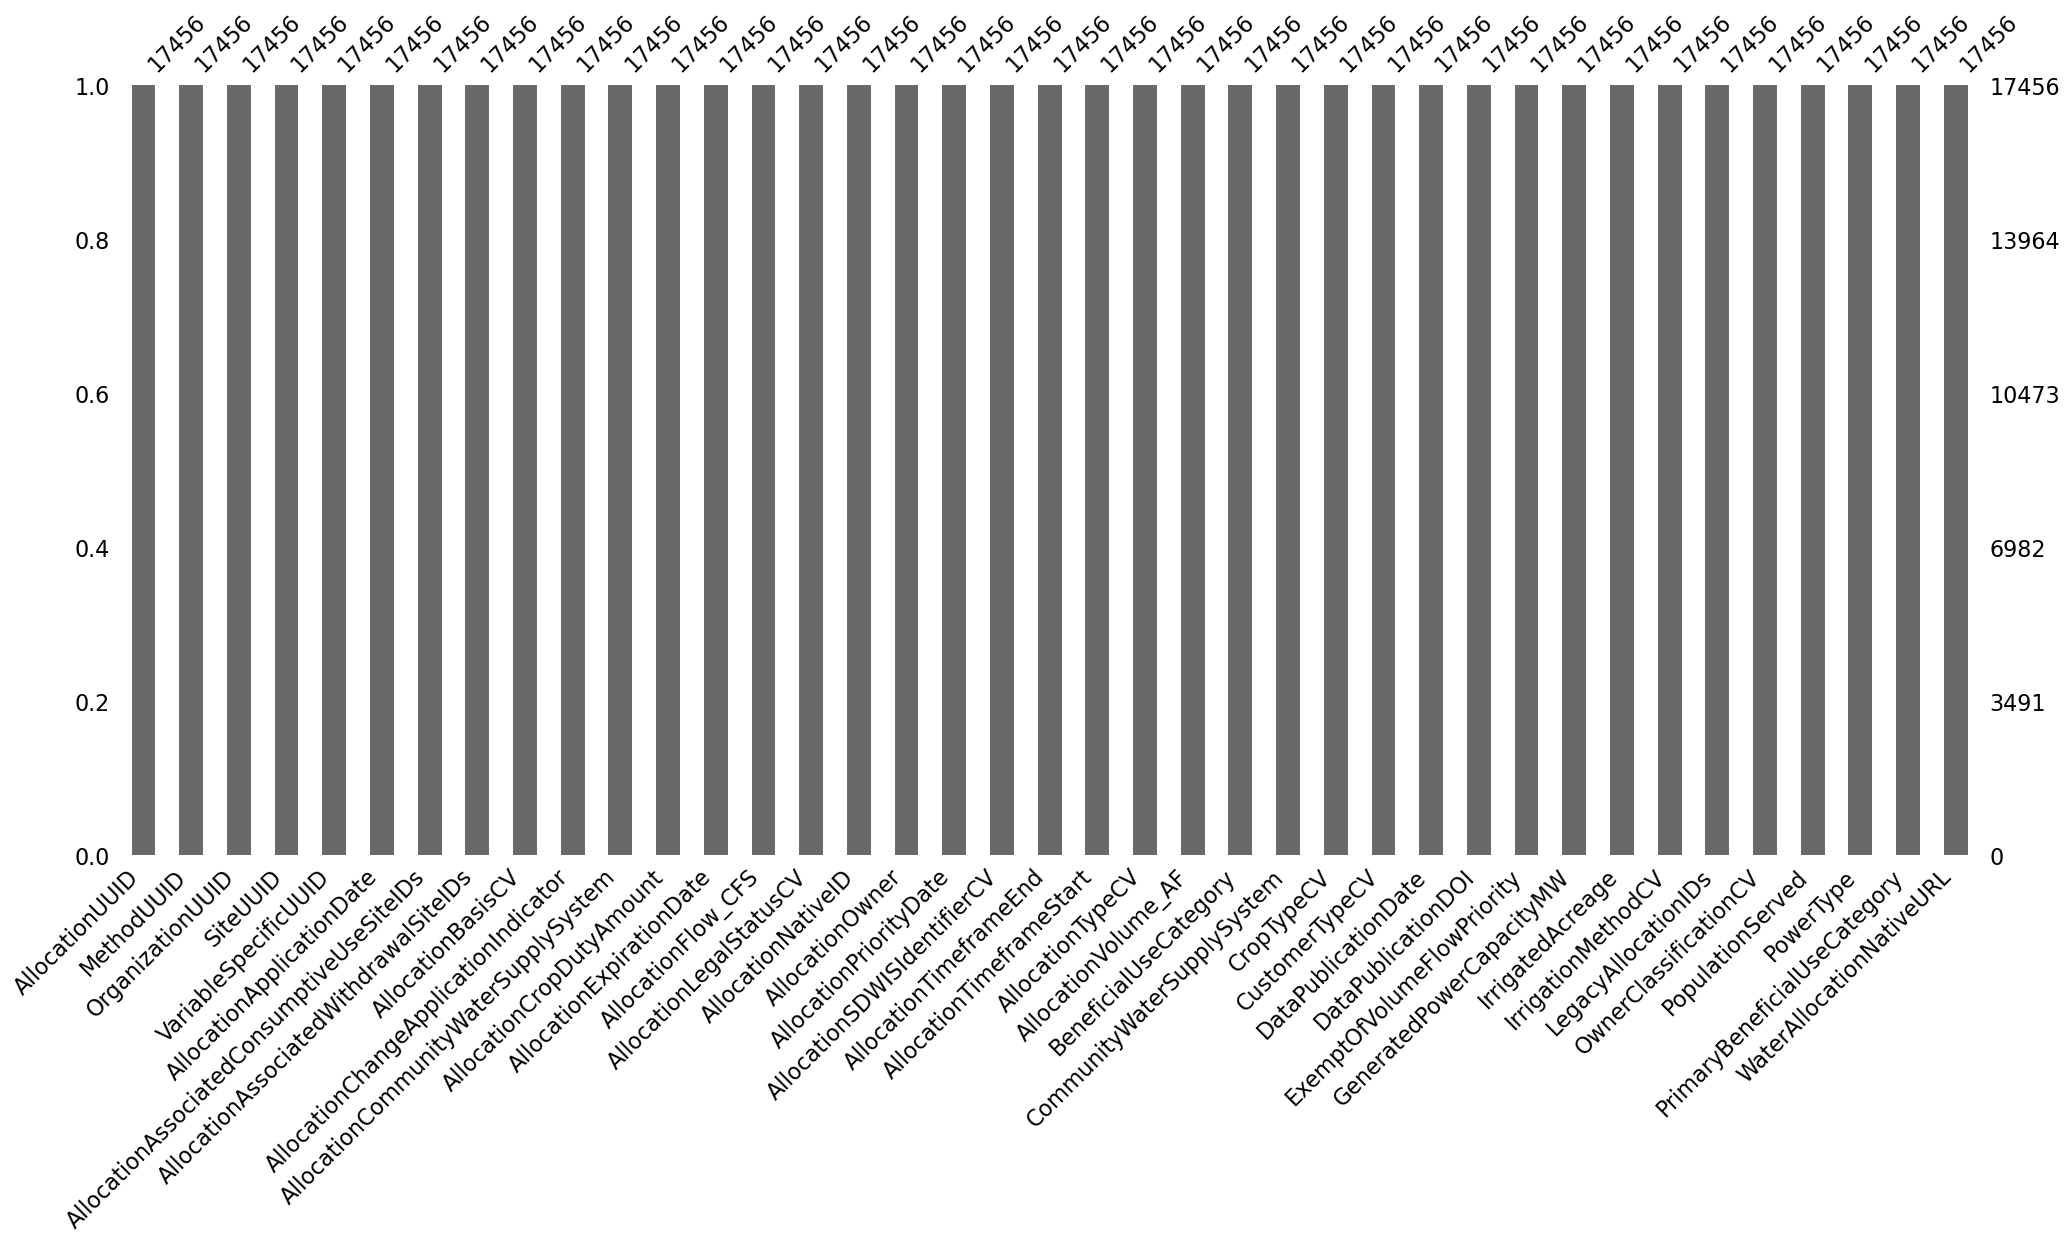

In [19]:
# Check what columns contain missing information.
#msno.matrix(dfaa, figsize=(10,5), fontsize=10)
msno.bar(dfaa)

## Num of Record Summary

In [20]:
# Num of entries of source data
print(f"Num of Source #1 Entries (rows): ", "|", len(dfin1))
print(f"Num of Source #2 Entries (rows): ", "|", len(dfin2))

Num of Source #1 Entries (rows):  | 18879
Num of Source #2 Entries (rows):  | 46


In [21]:
# Num of entries compiled into WaDE
podString =  len(dfs[dfs['PODorPOUSite'] == 'POD'])
pouString=  len(dfs[dfs['PODorPOUSite'] == 'POU'])
wrString = len(dfaa)
print("Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records")
print("**Compiled WaDE Data** |", podString, "|", pouString, "|", wrString)

Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records
**Compiled WaDE Data** | 17368 | 5 | 17456


## Markdown Table Creation

In [22]:
# method.csv
dftmp = dfm.copy().to_markdown()
print(dftmp)

|    | ï»¿MethodUUID   | ApplicableResourceTypeCV    | DataConfidenceValue   | DataCoverageValue   | DataQualityValueCV   | MethodDescription                                                                                                                               | MethodName                 | MethodNEMILink                                        | MethodTypeCV     | WaDEDataMappingUrl                                                                                     |
|---:|:----------------|:----------------------------|:----------------------|:--------------------|:---------------------|:------------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------|:------------------------------------------------------|:-----------------|:-------------------------------------------------------------------------------------------------------|
|  0 | AKwr_M1         | Surface Water & G

In [23]:
# variable.csv
dftmp = dfv.copy().to_markdown()
print(dftmp)

|    | VariableSpecificUUID   |   AggregationInterval  | AggregationIntervalUnitCV    | AggregationStatisticCV   | AmountUnitCV   | MaximumAmountUnitCV   |   ReportYearStartMonth  | ReportYearTypeCV    | VariableCV   | VariableSpecificCV   |
|---:|:-----------------------|-----------------------:|:-----------------------------|:-------------------------|:---------------|:----------------------|------------------------:|:--------------------|:-------------|:---------------------|
|  0 | AKwr_V1                |                      1 | WaDE Blank                   | WaDE Blank               | WaDE Blank     | WaDE Blank            |                       1 | WaDE Blank          | Allocation   | Allocation           |


In [24]:
# organizations.csv
dftmp = dfo.copy().to_markdown()
print(dftmp)

|    | ï»¿OrganizationUUID   | OrganizationContactEmail   | OrganizationContactName   | OrganizationName                   | OrganizationPhoneNumber   | OrganizationPurview             | OrganizationWebsite               | State   |
|---:|:----------------------|:---------------------------|:--------------------------|:-----------------------------------|:--------------------------|:--------------------------------|:----------------------------------|:--------|
|  0 | AKwr_O1               | kevin.petrone@alaska.gov   | Kevin Petrone             | Alaska Division of Water Recources | 907-269-8060              | Information Resource Management | https://dnr.alaska.gov/mlw/water/ | AK      |


In [25]:
# watersources.csv
dftmp = dfws.loc[[1]].copy().to_markdown()
print(dftmp)

|    | WaterSourceUUID   | Geometry   | GNISFeatureNameCV   | WaterQualityIndicatorCV   | WaterSourceName   | WaterSourceNativeID   | WaterSourceTypeCV   |
|---:|:------------------|:-----------|:--------------------|:--------------------------|:------------------|:----------------------|:--------------------|
|  1 | AKwr_WSwadeId2    |            |                     | Fresh                     | WaDE Blank        | wadeId2               | WaDE Blank          |


In [26]:
# sites.csv
dftmp = dfs.loc[[1]].copy().to_markdown()
print(dftmp)

|    | SiteUUID           | RegulatoryOverlayUUIDs   | WaterSourceUUIDs   | CoordinateAccuracy   | CoordinateMethodCV   | County     |   EPSGCodeCV | Geometry   | GNISCodeCV   | HUC12   | HUC8   |   Latitude |   Longitude | NHDNetworkStatusCV   | NHDProductCV   | PODorPOUSite   | SiteName   | SiteNativeID   | SitePoint   | SiteTypeCV   | StateCV   | USGSSiteID   |
|---:|:-------------------|:-------------------------|:-------------------|:---------------------|:---------------------|:-----------|-------------:|:-----------|:-------------|:--------|:-------|-----------:|------------:|:---------------------|:---------------|:---------------|:-----------|:---------------|:------------|:-------------|:----------|:-------------|
|  1 | AKwr_SPODADL100003 |                          | AKwr_WSwadeId3     | WaDE Blank           | Digitized            | WaDE Blank |         4326 |            |              |         |        |    56.4353 |     -132.37 |                      |                | PO

In [27]:
# waterallocations.csv
dftmp = dfaa.loc[[1]].copy().to_markdown()
print(dftmp)

|    | AllocationUUID   | MethodUUID   | OrganizationUUID   | SiteUUID         | VariableSpecificUUID   | AllocationApplicationDate   | AllocationAssociatedConsumptiveUseSiteIDs   | AllocationAssociatedWithdrawalSiteIDs   | AllocationBasisCV   | AllocationChangeApplicationIndicator   | AllocationCommunityWaterSupplySystem   | AllocationCropDutyAmount   | AllocationExpirationDate   |   AllocationFlow_CFS | AllocationLegalStatusCV   |   AllocationNativeID | AllocationOwner    | AllocationPriorityDate   | AllocationSDWISIdentifierCV   | AllocationTimeframeEnd   | AllocationTimeframeStart   | AllocationTypeCV   |   AllocationVolume_AF | BeneficialUseCategory   | CommunityWaterSupplySystem   | CropTypeCV   | CustomerTypeCV   | DataPublicationDate   | DataPublicationDOI   |   ExemptOfVolumeFlowPriority | GeneratedPowerCapacityMW   |   IrrigatedAcreage | IrrigationMethodCV   | LegacyAllocationIDs   | OwnerClassificationCV   | PopulationServed   | PowerType   | PrimaryBeneficialUseCategory   |

## Why Removed Records Summary

In [28]:
print("---- Reasons why records were removed from water source info ----")
if len(dfwspurge) != 0:
    print(dfwspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from watersources.csv input")
else:
    print("...nothing removed.")

---- Reasons why records were removed from water source info ----
...nothing removed.


In [29]:
print(" ---- Reasons why records were removed from site info ---- ")
if len(dfspurge) != 0:
    print(dfspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from sites.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site info ---- 
ReasonRemoved
Incomplete or bad entry for Latitude     671 | removed from sites.csv input
Unused Site Record                        11 | removed from sites.csv input
Incomplete or bad entry for Longitude      1 | removed from sites.csv input
Name: count, dtype: object


In [30]:
print(" ---- Reasons why records were removed from allocation amount info ---- ")
if len(dfaapurge) != 0:
    print(dfaapurge['ReasonRemoved'].value_counts().astype(str) + " | removed from waterallocations.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from allocation amount info ---- 
ReasonRemoved
Incomplete or bad entry for SiteUUID                   1297 | removed from waterallocations.csv input
Incomplete or bad entry for AllocationLegalStatusCV       6 | removed from waterallocations.csv input
Name: count, dtype: object


## Figures

In [31]:
# ---- merge watersource.csv to sites.csv ----

# explode site.csv on WaterSourceUUIDs
dfstemp = dfs.copy()
dfstemp = dfstemp.assign(WaterSourceUUIDs=dfstemp['WaterSourceUUIDs'].str.split(',')).explode('WaterSourceUUIDs').reset_index(drop=True)

# merge
dfstemp_ws = pd.merge(dfstemp, dfws[['WaterSourceUUID', 'WaterSourceTypeCV']], left_on='WaterSourceUUIDs', right_on='WaterSourceUUID', how='left')

# groupby site-watersource.csv via SiteUUID
dfstemp_ws = dfstemp_ws.groupby('SiteUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem != ""])).replace(np.nan, "").reset_index()

print(len(dfstemp_ws))
dfstemp_ws.head(1)

17373


SiteUUID RegulatoryOverlayUUIDs WaterSourceUUIDs  \
0  AKwr_SPODADL100002                          AKwr_WSwadeId1   

  CoordinateAccuracy CoordinateMethodCV      County EPSGCodeCV Geometry  \
0         WaDE Blank          Digitized  WaDE Blank       4326            

  GNISCodeCV HUC12 HUC8     Latitude       Longitude NHDNetworkStatusCV  \
0                        58.38291789  -134.644208062                      

  NHDProductCV PODorPOUSite    SiteName   SiteNativeID SitePoint  SiteTypeCV  \
0                       POD  WaDE Blank  PODADL 100002            WaDE Blank   

  StateCV USGSSiteID WaterSourceUUID WaterSourceTypeCV  
0      AK             AKwr_WSwadeId1        SUBSURFACE

PODorPOUSite
POD    17368
POU        5
Name: count, dtype: int64


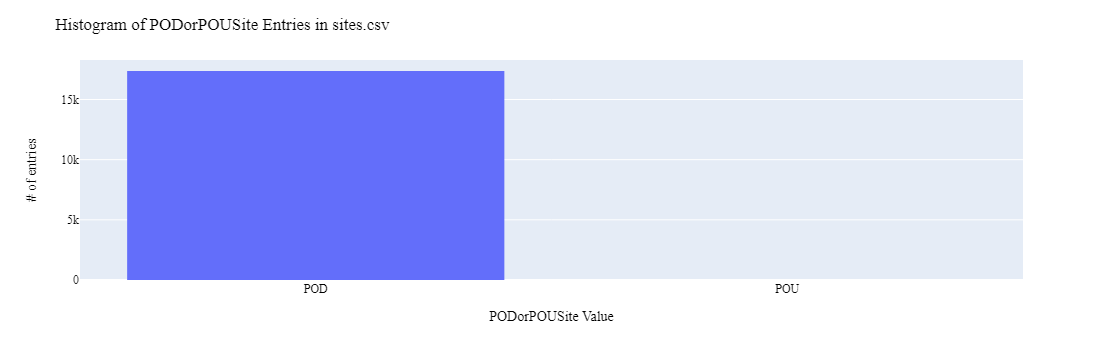

In [32]:
# ---- Histogram: Num of POD sites vs POU sites ----
print(dfstemp_ws.PODorPOUSite.value_counts())

fig = px.histogram(dfstemp_ws, x="PODorPOUSite")
fig.update_layout(bargap=0.2,
                  title="Histogram of PODorPOUSite Entries in sites.csv",
                  xaxis_title="PODorPOUSite Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PODorPOUSite.png', engine="kaleido")

WaterSourceTypeCV
SUBSURFACE            14064
SURFACE                3096
WaDE Blank              212
SURFACE,WaDE Blank        1
Name: count, dtype: int64


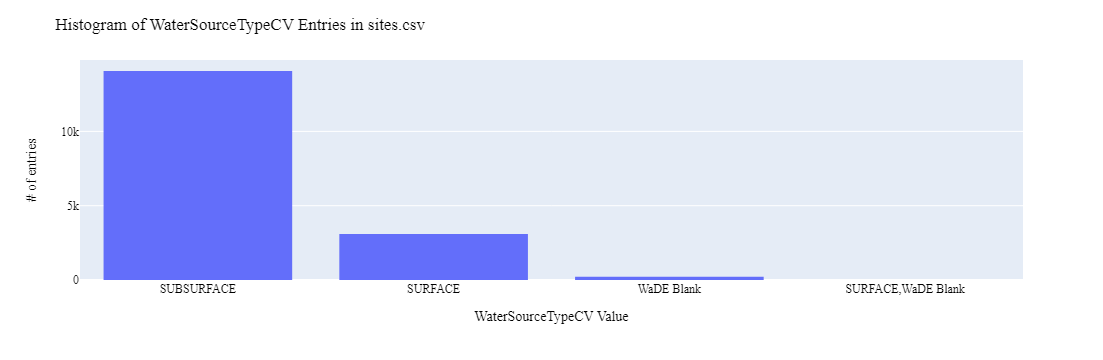

In [33]:
# ---- Histogram: Num of sites via WatersourceTypeCV ----
print(dfstemp_ws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfstemp_ws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in sites.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/WaterSourceTypeCV.png', engine="kaleido")

PrimaryBeneficialUseCategory
Unspecified    17456
Name: count, dtype: int64


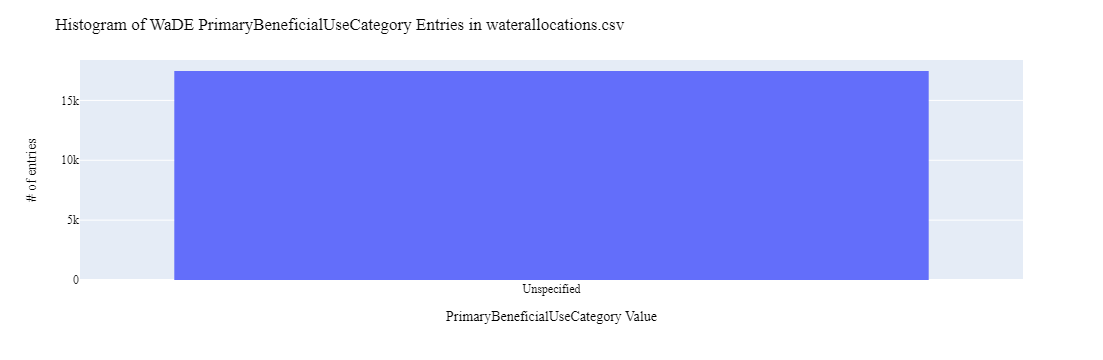

In [34]:
# ---- Histogram: Distribution of PrimaryBeneficialUseCategory WaDE Values ----
print(dfaa.PrimaryBeneficialUseCategory.value_counts())

fig = px.histogram(dfaa, x="PrimaryBeneficialUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaDE PrimaryBeneficialUseCategory Entries in waterallocations.csv",
                  xaxis_title="PrimaryBeneficialUseCategory Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PrimaryBeneficialUseCategory.png', engine="kaleido")

AllocationPriorityDate
    17456
Name: count, dtype: int64


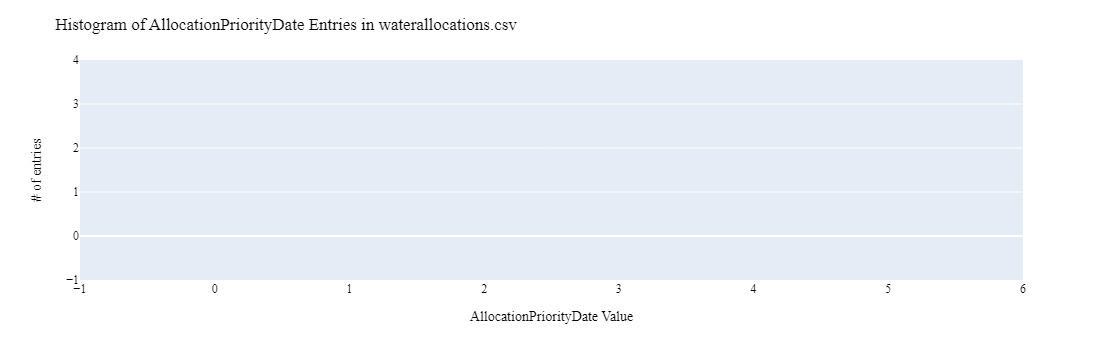

In [35]:
# ---- AllocationPriorityDate #1: histogram distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.histogram(dfaatemp, x="AllocationPriorityDate")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate1.png', engine="kaleido")

AllocationPriorityDate
    17456
Name: count, dtype: int64


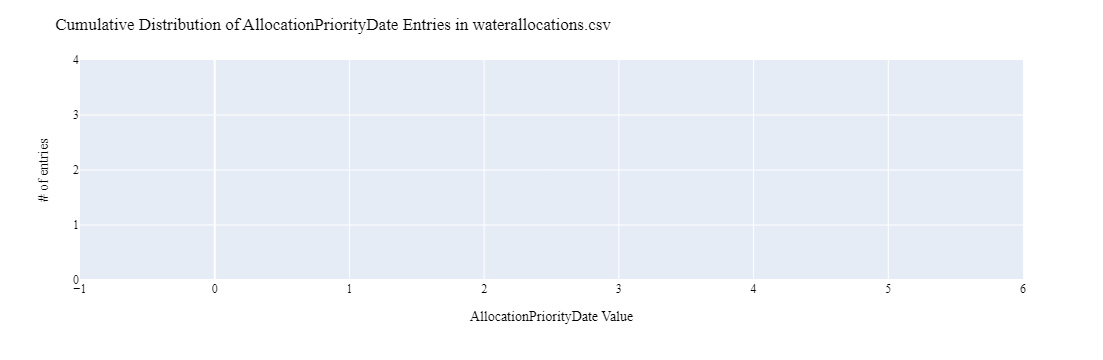

In [36]:
# ---- AllocationPriorityDate #2: cumulative distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.ecdf(dfaatemp, x="AllocationPriorityDate", ecdfnorm=None)
fig.update_layout(bargap=0.2,
                  title="Cumulative Distribution of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate2.png', engine="kaleido")

AllocationLegalStatusCV
CERT ISSUED     15086
ISSUED           1053
CER PND ACTN      869
APLN              228
PER PND ACTN      218
ACTV ADJDCTN        2
Name: count, dtype: int64


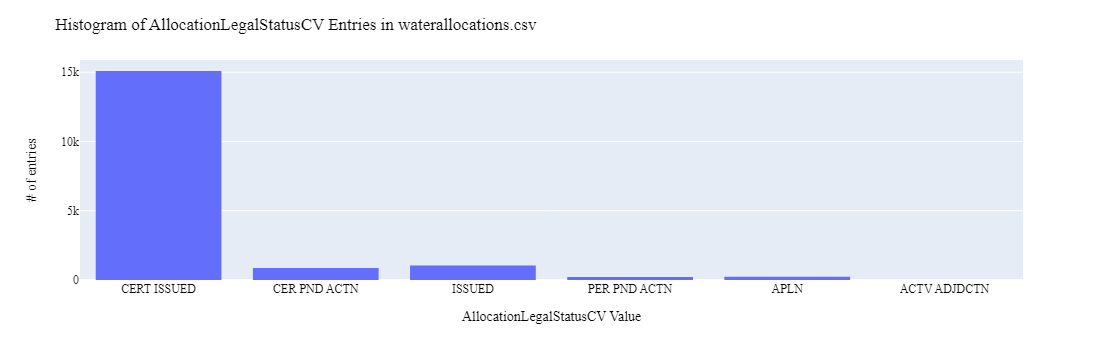

In [37]:
# ---- AllocationLegalStatusCV: histogram distribution of WaDE values ----
print(dfaa.AllocationLegalStatusCV.value_counts())

fig = px.histogram(dfaa, x="AllocationLegalStatusCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationLegalStatusCV Entries in waterallocations.csv",
                  xaxis_title="AllocationLegalStatusCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationLegalStatusCV.png', engine="kaleido")

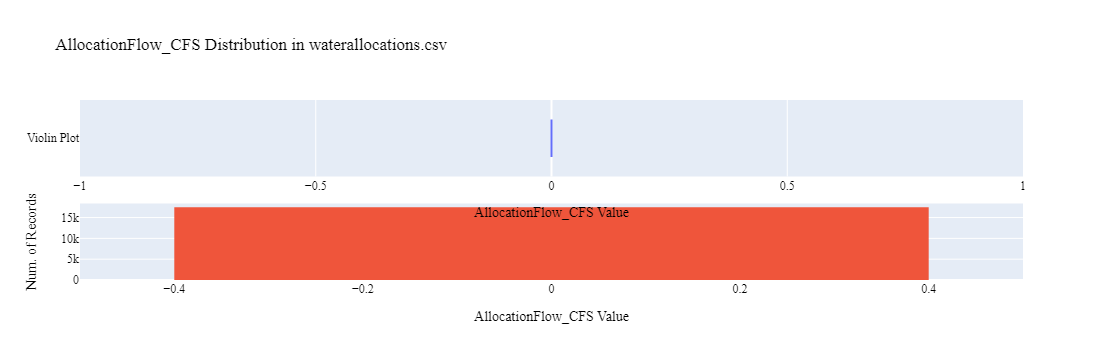

In [38]:
# ---- AllocationFlow_CFS: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfaa['AllocationFlow_CFS'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationFlow_CFS'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationFlow_CFS Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('figures/AllocationFlow_CFS.png', engine="kaleido")

except: print('Could not plot AllocationFlow_CFS value.')

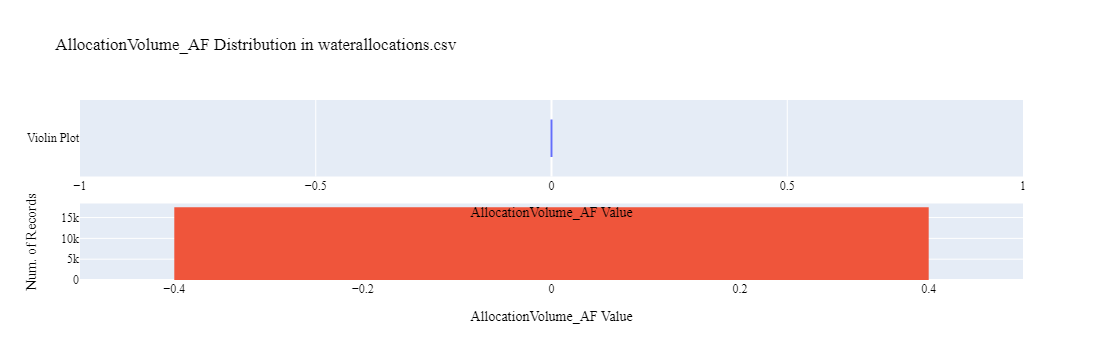

In [39]:
# ---- AllocationVolume_AF: Boxplot distribution of WaDE values ----

try:
    trace1 = go.Violin(x=dfaa['AllocationVolume_AF'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationVolume_AF'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationVolume_AF Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    fig.write_image('figures/AllocationVolume_AF.png', engine="kaleido")

except: print('Could not plot AllocationVolume_AF value.')

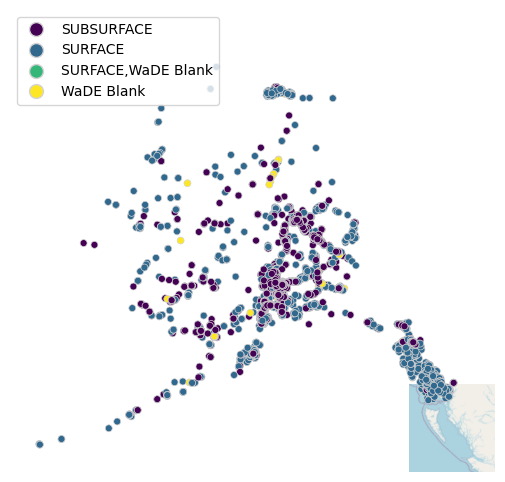

In [40]:
# ---- Map of Points sites ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] == ''].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=gpd.points_from_xy(dfstemp.Longitude.astype(float), dfstemp.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfstemp, hue='WaterSourceTypeCV', edgecolor='lightgray', linewidth=0.5, legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointMap.png') 
except:
    print('No point data to plot')

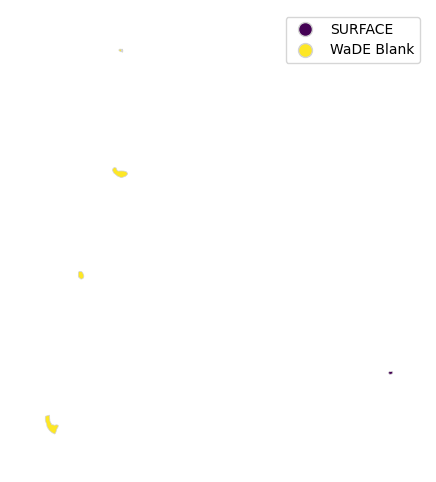

In [41]:
# ---- Map of Polygons ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfstemp['Geometry'] = gpd.GeoSeries.from_wkt(dfstemp['Geometry'], crs="EPSG:4326")
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=dfstemp['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gplt.choropleth(gdfstemp, edgecolor='lightgray', linewidth=0.5, hue='WaterSourceTypeCV', legend=True, ax=ax)
    mplt.savefig(format="png", fname='figures/PolyMap.png')
except:
    print('No geometry data to plot')

# Removed Records compared to Source Data
- this is working just fine, just want to comment out temporarily for future use

In [42]:
# # Explode purge.xlsx files by WaDEUUID, concat together
# #################################################################

# # Explode watersources_missing.xlsx records by WaDEUUID
# dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode sites_missing.xlsx records by WaDEUUID
# dfspurgeCopy = dfspurge.assign(WaDEUUID=dfspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfspurgeCopy = dfspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode waterallocations_missing.xlsx records by WaDEUUID
# dfaapurgeCopy = dfaapurge.assign(WaDEUUID=dfaapurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfaapurgeCopy = dfaapurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # concat purge dataframes togehter
# frames = [dfwspurgeCopy, dfspurgeCopy, dfaapurgeCopy] 
# dfWaDEUUID = pd.concat(frames)
# dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
# print(len(dfWaDEUUID))
# dfWaDEUUID.head(1)

# Custom Queries and Analysis for this Dataset

In [43]:
# N/A